# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower, TTestPower
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

C:\Users\lraic\Anaconda3\envs\learn-env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\lraic\Anaconda3\envs\learn-env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompati

In [17]:
#Your code here
df = pd.read_csv('multipleChoiceResponses_cleaned.csv')
df.head()

C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, r

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
dfa = df.copy()

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

H0 = Education does not signifigantly affect salary  
Ha = Education does signifigantly affect salary  
alpha = .05

In [35]:
dfa.AdjustedCompensation.head()

0         NaN
1         NaN
2         NaN
3    250000.0
4         NaN
Name: AdjustedCompensation, dtype: float64

In [33]:
dfa.AdjustedCompensation.isna().sum()

22051

In [34]:
dfa.FormalEducation.head()

0    Bachelor's degree
1      Master's degree
2      Master's degree
3      Master's degree
4      Doctoral degree
Name: FormalEducation, dtype: object

In [36]:
dfa = dfa.loc[dfa['AdjustedCompensation'] > 1]

In [37]:
len(dfa)

4291

In [38]:
dfa.AdjustedCompensation.isna().sum()

0

In [40]:
dfa.FormalEducation.isna().sum()

1

In [88]:
dfb = dfa.loc[dfa['FormalEducation'] == "Bachelor's degree"]

In [89]:
dfm = dfa.loc[dfa['FormalEducation'] == "Master's degree"]

In [117]:
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [51]:
dfb.AdjustedCompensation.describe()

count    1.093000e+03
mean     6.571822e+04
std      3.088086e+05
min      2.731475e+01
25%      1.200000e+04
50%      3.946226e+04
75%      8.138260e+04
max      9.999999e+06
Name: AdjustedCompensation, dtype: float64

In [52]:
dfm.AdjustedCompensation.describe()

count    1.963000e+03
mean     7.009088e+04
std      1.362120e+05
min      1.092960e+00
25%      2.343000e+04
50%      5.381217e+04
75%      9.300000e+04
max      4.498900e+06
Name: AdjustedCompensation, dtype: float64

In [63]:
def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """
    numer = a.mean() - b.mean()
    denom = np.sqrt(((a.var(ddof=1))/len(a))+((b.var(ddof=1))/len(b)))
    t = np.abs(numer/denom)

    
    return t

def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    numer = (((a.var(ddof=1))/len(a))+((b.var(ddof=1))/len(b)))**2
    denom = ((a.var(ddof=1))/len(a))**2/(len(a)-1) + ((b.var(ddof=1))/len(b))**2/(len(b)-1)
    dof = numer/denom
    return dof

def p_value(a, b, two_sided=False):
    #Your code here
    t = welch_t(a,b)
    df = welch_df(a, b)
    if two_sided == False:
        p = 1 - stats.t.cdf(t,df)
    elif two_sided == True:
        p = (1 - stats.t.cdf(t,df))*2
        
    return p

In [91]:
p_value(dfb.AdjustedCompensation, dfm.AdjustedCompensation)

0.32831750397523396

In [92]:
dfm.AdjustedCompensation.mean(), dfm.AdjustedCompensation.median()

(70090.88017350891, 53812.17000000001)

In [93]:
dfb.AdjustedCompensation.mean(), dfb.AdjustedCompensation.median()

(65718.2200765453, 39462.258)

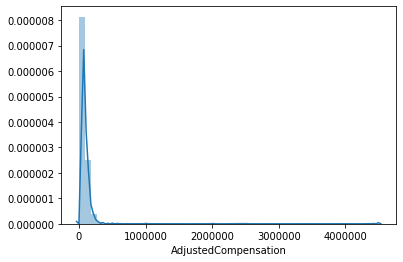

In [68]:
sns.distplot(dfm.AdjustedCompensation)

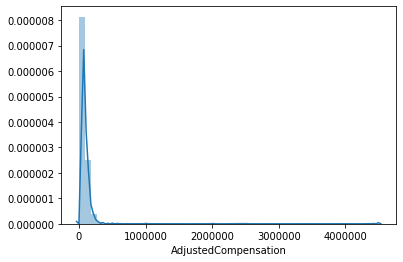

In [69]:
sns.distplot(dfm.AdjustedCompensation)

In [94]:
dfm = dfm.loc[dfm['AdjustedCompensation'] < 250000]
dfb = dfb.loc[dfb['AdjustedCompensation'] < 250000]

In [95]:
p_value(dfb.AdjustedCompensation, dfm.AdjustedCompensation)

1.3473388515983231e-08

In [96]:
dfm.AdjustedCompensation.mean(), dfm.AdjustedCompensation.median(), len(dfm)

(62389.39973199071, 53812.17000000001, 1938)

In [97]:
dfb.AdjustedCompensation.mean(), dfb.AdjustedCompensation.median(), len(dfb)

(52045.79726265185, 38480.7, 1080)

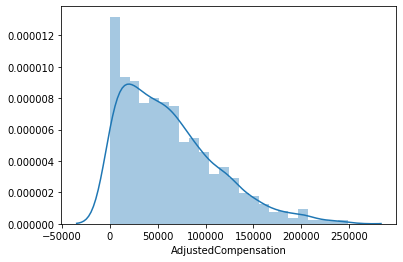

In [98]:
sns.distplot(dfm.AdjustedCompensation)

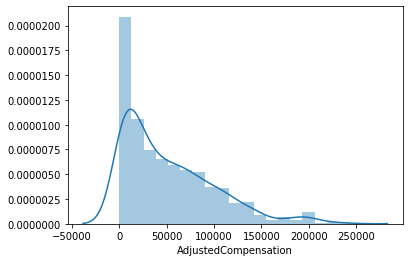

In [99]:
sns.distplot(dfb.AdjustedCompensation)

Very low p-value after taking away the outliers so seems to be a high correlation between salary and education with regards to bachelors and masters degrees

In [ ]:
#Your code here

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [85]:
dfd = dfa.loc[dfa['FormalEducation'] == "Doctoral degree"]

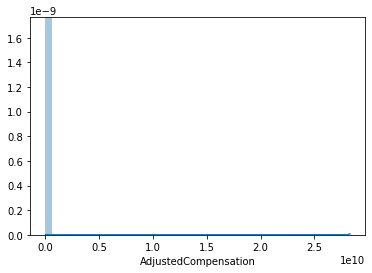

In [86]:
sns.distplot(dfd.AdjustedCompensation)

In [87]:
dfd.AdjustedCompensation.describe()

count    9.620000e+02
mean     2.971985e+07
std      9.123598e+08
min      2.797536e+00
25%      4.000000e+04
50%      7.425890e+04
75%      1.200000e+05
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64

In [103]:
dfda = dfd.loc[dfd['AdjustedCompensation'] < 5000000]

In [105]:
dfda.AdjustedCompensation.describe()

count        960.000000
mean       87595.870634
std        71496.549342
min            2.797536
25%        40000.000000
50%        74200.056000
75%       120000.000000
max      1000000.000000
Name: AdjustedCompensation, dtype: float64

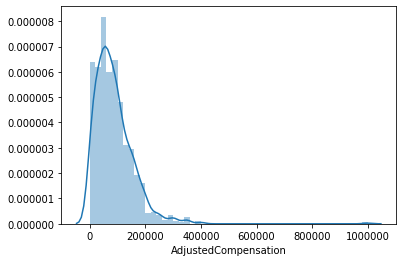

In [107]:
sns.distplot(dfda.AdjustedCompensation)

In [108]:
dfda = dfd.loc[dfd['AdjustedCompensation'] < 500000]

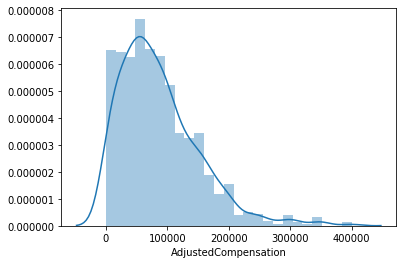

In [109]:
sns.distplot(dfda.AdjustedCompensation)

In [110]:
dfda.AdjustedCompensation.describe()

count       959.000000
mean      86644.458612
std       65170.606207
min           2.797536
25%       40000.000000
50%       74141.212000
75%      120000.000000
max      400000.000000
Name: AdjustedCompensation, dtype: float64

In [115]:
p_value(dfb.AdjustedCompensation, dfd.AdjustedCompensation)

0.15671700583230652

In [111]:
p_value(dfb.AdjustedCompensation, dfda.AdjustedCompensation)

0.0

In [114]:
dfb.AdjustedCompensation.mean(), dfb.AdjustedCompensation.median(), len(dfb)

(52045.79726265185, 38480.7, 1080)

In [113]:
dfda.AdjustedCompensation.mean(), dfda.AdjustedCompensation.median(), len(dfda)

(86644.4586115245, 74141.212, 959)

In [11]:
#Your code here

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [129]:
dfa['B'] = dfa['FormalEducation'].apply(lambda x: 1 if x == "Bachelor's degree" else 0)

In [130]:
dfa.B.head()

3     0
8     1
9     1
11    1
14    0
Name: B, dtype: int64

In [131]:
dfa['M'] = dfa['FormalEducation'].apply(lambda x: 1 if x == "Master's degree" else 0)

In [132]:
dfa['D'] = dfa['FormalEducation'].apply(lambda x: 1 if x == "Doctoral degree" else 0)

In [135]:
dff = dfa.loc[dfa['AdjustedCompensation'] < 5000000]

In [136]:
#Your code here
formula = 'AdjustedCompensation ~ C(B) + C(M) + C(D)'
lm = ols(formula, dff).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                sum_sq      df         F    PR(>F)
C(B)      7.592043e+10     1.0  5.991354  0.014416
C(M)      6.417508e+09     1.0  0.506446  0.476720
C(D)      3.231646e+10     1.0  2.550293  0.110348
Residual  5.428541e+13  4284.0       NaN       NaN


In [137]:
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, dff).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F        PR(>F)
C(FormalEducation)  6.822177e+11     6.0  8.995454  8.637334e-10
Residual            5.409940e+13  4280.0       NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!